In [1]:
#!pip install yfinance==0.2.4

In [2]:
import yfinance as yf
import pandas as pd
import json

In [3]:
apple = yf.Ticker("AAPL")

Scrapping json data from website

In [4]:
import requests

# URL of the JSON data
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    apple_info = response.json()

    # Now you can work with the JSON data
    print("done")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


done


In [5]:
type(apple_info)

dict

We can get the <code>'country'</code> using the key country

In [6]:
apple_info["country"]

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_stock_price=apple.history(period="20y")
apple_stock_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-10-14 00:00:00-04:00,0.368621,0.374986,0.366650,0.372107,275419200,0.0,0.0
2003-10-15 00:00:00-04:00,0.376654,0.379079,0.372561,0.376199,610103200,0.0,0.0
2003-10-16 00:00:00-04:00,0.360739,0.361345,0.339671,0.352403,975682400,0.0,0.0
2003-10-17 00:00:00-04:00,0.354372,0.356039,0.339973,0.344823,359811200,0.0,0.0
2003-10-20 00:00:00-04:00,0.342550,0.353766,0.339215,0.351947,279132000,0.0,0.0


In [8]:
apple_stock_price.shape

(5035, 7)

In [9]:
#resetting the index

apple_stock_price.reset_index(inplace=True)

In [10]:
apple_stock_price.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2003-10-14 00:00:00-04:00,0.368621,0.374986,0.366650,0.372107,275419200,0.0,0.0
1,2003-10-15 00:00:00-04:00,0.376654,0.379079,0.372561,0.376199,610103200,0.0,0.0
2,2003-10-16 00:00:00-04:00,0.360739,0.361345,0.339671,0.352403,975682400,0.0,0.0
3,2003-10-17 00:00:00-04:00,0.354372,0.356039,0.339973,0.344823,359811200,0.0,0.0
4,2003-10-20 00:00:00-04:00,0.342550,0.353766,0.339215,0.351947,279132000,0.0,0.0


<Axes: xlabel='Date'>

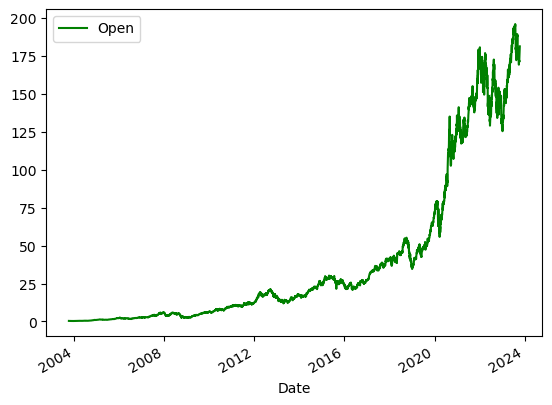

In [11]:
apple_stock_price.plot(x="Date",y="Open",color="green")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

<Axes: xlabel='Date'>

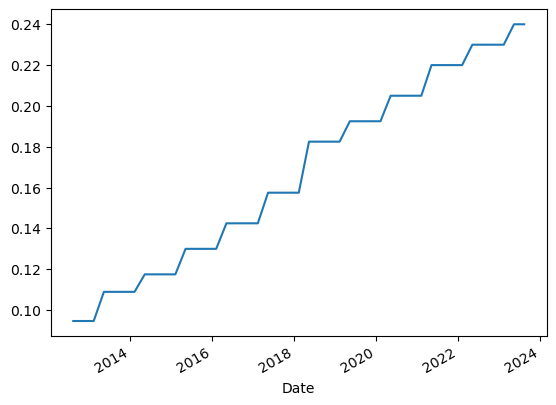

In [12]:
apple.dividends.plot()

# Stage 2

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import html5lib

Using Webscraping to Extract Stock Data Example

We will extract Netflix stock data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html.

In [14]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.


In [15]:
data=requests.get(url)

### Step 2: Parse the HTML content

<hr>
<hr>
<center>

# What is parsing?
In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning.
Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.</center>
|


Next you will take the raw HTML content of a web page or a string of HTML code which needs to be parsed and transformed into a structured, hierarchical format that can be more easily analyzed and manipulated in Python. This can be done using a Python library called <b>Beautiful Soup</b>.

## Parsing the data using the BeautifulSoup library
* Create a new BeautifulSoup object.
<br>
<br>
<b>Note: </b>To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:

1. The HTML or XML content that you want to parse as a string.
2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library.
here in this lab we are using "html5lib" parser.

When you create the BeautifulSoup object, you need to pass the content of the response (i.e., data.content) to BeautifulSoup, not the entire Response object.

In [16]:
soup=BeautifulSoup(data.content,"html5lib")

### Step 3: Identify the HTML tags


The web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.


You will create an empty data frame using the <b> pd.DataFrame() </b> function with the following columns:
* "Date"
* "Open"
* "High" 
* "Low" 
* "Close"
* "Volume"

In [17]:
rows_data = []



### Working on HTML table 


These are the following tags which are used while creating HTML tables.

* &lt;table&gt;: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt;: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt;: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt;: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt;: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.



### Step 4: Use a BeautifulSoup method for extracting data


We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.

In [18]:

for row in soup.find("tbody").find_all('tr'): # each row of "tbody" we need to find "tr"
    
    col = row.find_all("td")   # in each row find "td" which gives table cells
    date = col[0].text          # converting first cell to text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    row_data = {
            "Date": date,
            "Open": Open,
            "High": high,
            "Low": low,
            "Close": close,
            "Adj Close": adj_close,
            "Volume": volume}
        
        # Append the data for each row as a dictionary to the list
        
    rows_data.append(row_data)
    
     # Create a DataFrame from the list of dictionaries
        
    netflix_data = pd.DataFrame(rows_data)


Step 5: Print the extracted data

In [19]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"


# Extracting data using `pandas` library

We can also use the pandas `read_html` function from the pandas library and use the URL for extracting data.


<center>

## What is read_html in pandas library?
`pd.read_html(url)` is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. It takes in a URL as input and returns a list of all the tables found on the web page. 
</center>


In [20]:
read_html_pandas_data = pd.read_html(url)

Or you can convert the BeautifulSoup object to a string.


In [21]:
read_html_pandas_data = pd.read_html(str(soup))

Because there is only one table on the page, just take the first table in the returned list.


In [22]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


Question 1: Use yfinance to Extract Stock Data Reset the index, save, and display the first five rows of the **tesla_data** dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [23]:
url="https://finance.yahoo.com/quote/TSLA/history?p=TSLA"

In [24]:
data=requests.get(url)

In [25]:
soup=BeautifulSoup(data.content,"html5lib")

In [26]:
rows_data = []
for row in soup.find("tbody").find_all('tr'): # each row of "tbody" we need to find "tr"
    if len(col) >= 5:
        col = row.find_all("td")   # in each row find "td" which gives table cells
        date = col[0].text          # converting first cell to text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        
    
    
    
     # Append the data for each row as a dictionary to the list
    row_data = {
            "Date": date,
            "Open": Open,
            "High": high,
            "Low": low,
            "Close": close,
            "Adj Close": adj_close,
            "Volume": volume}
        
       
        
    rows_data.append(row_data)
    
     # Create a DataFrame from the list of dictionaries
        
    netflix_data = pd.DataFrame(rows_data)


IndexError: list index out of range

In [27]:
netflix_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"
...,...,...,...,...,...,...,...
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,91.84,"488,193,200"
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,"319,939,200"
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,"320,321,800"
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,"446,204,400"


In [28]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [29]:
## Define Graphing Function


In [30]:
tesla=yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [31]:
tesla_data=tesla.history(period="20y")

Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [32]:
tesla_data.reset_index(inplace=True)

In [33]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [34]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [35]:
html_data=requests.get(url)

In [36]:
soup=BeautifulSoup(html_data.content,"html5lib")

In [37]:
read_html_pandas_data = pd.read_html(str(soup))

In [38]:
tesla_revenue = read_html_pandas_data[0]

tesla_revenue.head()

,Tesla Annual Revenue (Millions of US $),Tesla Annual Revenue (Millions of US $).1
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [39]:
# for changing the coloumn headers

tesla_revenue.columns=["Date","Revenue"]

In [40]:
# for removing unwanted symbols

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

In [58]:
tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [42]:
# dropping all na values
tesla_revenue.dropna().head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


### Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function.

In [43]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [44]:
GameStop=yf.Ticker("GME")

In [45]:
gme_data=GameStop.history(period="200y")

In [46]:
gme_data.reset_index(inplace=True)

In [47]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [48]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [49]:
html_data=requests.get(url)

In [50]:
soup=BeautifulSoup(html_data.content,"html5lib")

In [51]:
read_html_pandas_data = pd.read_html(str(soup))

In [52]:
gme_revenue = read_html_pandas_data[0]

gme_revenue.head()

,GameStop Annual Revenue (Millions of US $),GameStop Annual Revenue (Millions of US $).1
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [53]:
gme_revenue.columns=["Date","Revenue"]

In [54]:
gme_revenue["Revenue"]=gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

In [55]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph

In [59]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [60]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


TypeError: Invalid comparison between dtype=int64 and str

Question 6: Plot GameStop Stock Graph

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop')

In [ ]:
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

In [ ]:
import base64

# Replace `encodestring()` with `encodebytes()`
encoded_string = base64.encodebytes(b"Hello, world!").decode()

# Print the encoded string
print(encoded_string)

In [ ]:
import nbformat
